# To find a job during the pandemic, I built a customized job posting filter for myself

In [4]:
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup
import time
import random
from selenium.webdriver.common.keys import Keys
from datetime import datetime
import re

## Web-scraping

Specify your requirements

In [20]:
# level
level = str(input("Enter experience level(entry/mid/senior): ")).lower()+'_level'

# location
location = str(input("Enter location: ")).lower().replace(' ','+')

# job query
query = str(input("Enter keywords: ")).lower().replace(' ','+')

url_link = 'https://www.indeed.com/jobs?q='+query+'&l='+location+'&explvl='+level
print(f'Your search url is ready: {url_link}')

Enter experience level(entry/mid/senior): entry
Enter location: California
Enter keywords: data analyst
Your search url is ready: https://www.indeed.com/jobs?q=data+analyst&l=california&explvl=entry_level


In [70]:
query = 'data+scientist'
location = 'California'
level = 'entry_level'
url_link = 'https://www.indeed.com/jobs?q='+query+'&l='+location+'&explvl='+level

In [71]:
# Check if the link looks good
url_link

'https://www.indeed.com/jobs?q=data+scientist&l=California&explvl=entry_level'

In [1]:
# Store pages in a table called postings
postings = pd.DataFrame(columns=['title','location','company','urgent','job_description','date_released','job_ID'])
driver = webdriver.Chrome('chromedriver')

starttime = datetime.now()
start = time.time()
for i in range(0,30):
    time.sleep(random.randint(1,3)+random.random())

    driver.get(str(url_link)+'&sort=date&start='+str(10*i))
    search_results = driver.find_elements_by_class_name('result')

    for result in search_results:
        result_html = result.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html,'html.parser')
        sleep_time = random.randint(0,2) + random.random()  
    
        # find elements we need for each clickcard
        ## Job title
        try:
            job_title = soup.find('a',{'class':'jobtitle'}).text.replace('\n','')
        except:
            job_title = None

        ## Job location
        try:
            job_location = soup.find('',{'class':'location'}).text.split(',')[0]
        except:
            job_location = None

        ## Company
        try:
            company = soup.find('',{'class':'company'}).text.replace('\n','')
        except:
            company = None

        ## Date released
        try:
            release_date = soup.find('',{'class':'date'}).text.replace('\n','')
        except:
            release_date = None

        ## job description
        try:
            summary = result.find_elements_by_class_name('summary')[0]
            summary.click()
        except:
            webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()
            summary = result.find_elements_by_class_name('title')[0]
            summary.click()
            
        try:
            driver.implicitly_wait(5)
            jd = driver.find_element_by_id('vjs-desc').text.strip()
            print('page '+str(i)+' jd')
        except:
            jd = None
            print('page '+str(i)+' failed')
        
        ## Job ID
        jobID = driver.find_element_by_css_selector("div.jobsearch-SerpJobCard.unifiedRow.row.result.clickcard.vjs-highlight").get_attribute('id')

        ## Urgent or not
        try:
            urgent = driver.find_element_by_class_name('serpvj-UrgentlyHiringMessage-text').text
        except:
            urgent = None

        postings = postings.append({'title': job_title,'location':job_location,'company':company,\
                                    'job_description':jd,'urgent':urgent,'date_released':release_date,'job_ID':jobID},ignore_index=True)

driver.close()
end = time.time()

print('Finished')
print('start from time:'+str(starttime))
print(f"Runtime of the program is {end - start}")

In [7]:
postings

,title,location,company,urgent,job_description,date_released,job_ID
0,Data Analyst,Fremont,Weee! Inc,None,"About Weee!\nWeee!, headquartered in Fremont, ...",Just posted,p_d230ba30c00f04b0
1,Data/Financial Analyst,Carlsbad,Raso Solutions,None,"Primary Responsibilities—\nCollect, aggregate,...",Just posted,p_a7cf442ed5b0e618
2,"Apple Media Products (AMP) - Big Data Analyst,...",Santa Clara Valley,Apple,None,"Summary\nPosted: Jun 1, 2020\nRole Number:2001...",Just posted,p_16dec0f4c6c33128
3,Graduate Business Analyst,San Francisco Bay Area,Arbor Financial Systems,None,expand(document.getElementById('wpex955451359'...,Just posted,p_d0963e0c8de905f7
4,OIR Data Systems Analyst,Irvine,University of California - Irvine,None,Job Title\nOIR Data Systems Analyst\nJob ID\n8...,Just posted,p_330de3e7c9f0f8b8
5,Board Certified Behavior Analyst (BCBA),Oakland,Achieve Beyond Pediatric Therapy & Autism Serv...,None,Come join a team of passionate therapists prov...,Just posted,p_f2a641bcf15dba63
6,Lead Jira Business Analyst,San Francisco,Kforce,None,RESPONSIBILITIES:\nKforce has a client seeking...,Today,pj_a4ef1092d2be6820


In [35]:
postings.to_csv('postings_product_analyst.csv',index=False)

## Process data

Before further analysis, first we need to process the data

### Merge several datasets

In [8]:
data_analyst = pd.read_csv('postings_data_analyst.csv')
data_science = pd.read_csv('postings_data_science.csv')
data_scientist = pd.read_csv('postings_data_scientist.csv')
data_visualization = pd.read_csv('postings_data_visualization.csv')
product_analyst = pd.read_csv('postings_product_analyst.csv')
machine_learning = pd.read_csv('postings_machine_learning.csv')

frame = [data_analyst,data_science,data_scientist,data_visualization,machine_learning,product_analyst]
all_postings = pd.concat(frame)

C:\Users\nora_\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [9]:
all_postings.reset_index(drop=True,inplace=True)

In [11]:
# Might have many job postings overlapping 
postings = all_postings.drop_duplicates()
postings.reset_index(inplace=True,drop=True)

In [23]:
postings

,title,location,company,urgent,job_description,date_released,job_ID
0,Data Systems Analyst,San Francisco,University of California San Francisco,None,The Data Systems Analyst will maintain clinica...,Just posted,p_a377118481b69512
1,Data Analyst,Santa Monica,FIGS,None,Do you love all things Data? Are you a believe...,Just posted,p_b2e87011d24e62bd
2,Junior Business Analyst,San Jose,Mindsgroup Infotech LLC,None,Job Description\nLooking for fresher/ experien...,Just posted,p_aea603d8820e7a5c
3,Lead Jira Business Analyst,San Francisco,Kforce,None,RESPONSIBILITIES:\nKforce has a client seeking...,Today,pj_a4ef1092d2be6820
4,Lending Operations and Data Analyst,San Francisco,Intuit,None,The QuickBooks Capital (QBC) team is on a miss...,Today,p_272e288364fe1c81
5,Data Analyst,Fremont,Weee! Inc,None,"About Weee!\nWeee!, headquartered in Fremont, ...",Today,p_d230ba30c00f04b0
6,"Apple Media Products (AMP) - Big Data Analyst,...",Santa Clara Valley,Apple,None,"Summary\nPosted: Jun 1, 2020\nRole Number:2001...",Today,p_16dec0f4c6c33128
7,Data/Financial Analyst,Carlsbad,Raso Solutions,None,"Primary Responsibilities—\nCollect, aggregate,...",Today,p_a7cf442ed5b0e618
8,Graduate Business Analyst,San Francisco Bay Area,Arbor Financial Systems,None,expand(document.getElementById('wpex955451359'...,Today,p_d0963e0c8de905f7


### Process ID

In [3]:
postings['job_ID'] = [x.split('_')[1] for x in postings.job_ID]

In [6]:
# Create a url column so I can relate back to the webpage
postings['url'] = [url_link+'&vjk='+x for x in postings.job_ID]

### Process date

In [241]:
# We keep only postings released within 30 days
postings = postings[postings['date_released']!='30+ days ago']
postings.reset_index(inplace=True,drop=True)

days = []
for i in range(0,len(postings)):
    if postings.date_released[i]=='Just posted':
        days_ago = 0
    elif postings.date_released[i]=='Today':
        days_ago = 0
    else:
        days_ago = int(postings.date_released[i].split(" ")[0])
    days.append(days_ago)
postings['days_ago']=days

### Process job description text

In [244]:
# Replace all the newline symbol with space since paragraphs won't matter
postings['clean_text'] = [x.replace('\n',' ') for x in postings.job_description]

# Convert all strings to lowercase
postings.clean_text = [x.lower() for x in postings.clean_text]

# Replace all punctuations to space
postings.clean_text = [re.sub(r"[()-/:,.;@#?!&$]+\ *", " ", x) for x in postings.clean_text]

C:\Users\nora_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [352]:
# Check how the text look
postings.clean_text[1]

'to apply go to jobs cset org summary the purpose of this position is to ensure compliance with grants and contracts regarding participant documentation and reporting the position will be responsible for collecting information required for reports and ensuring timely submission of each report the position will also be responsible for developing and managing a dashboard of organizational data and assisting in the transition to electronic signature software essential duties and responsibilities include the following remains knowledgeable and current in relevant grant and contract obligations requirements and guidelines keeps program staff well informed of any special participant needs or program changes completes necessary reports regarding program progress to assigned leadership staff and funding sources establish systems and protocols to ensure accurate gathering of information and timely submittal of reports work with department staff to ensure benchmarks and goals are being met manag

## Customize the Job Selector

1. Create meaningful metrics according to my portfolio<br>
2. Quantify by giving each metric a weight and calculate overall score 

In [15]:
# A customized keyword list is used to match skills with job requirements
keywords = pd.read_csv('keywords_for_ranking.csv')
keywords.columns

Index(['Database', 'Python', 'R', 'Big Data', 'Data Manipulation',
       'Data Visualization', 'Stats', 'Machine Learning', 'NLP',
       'Cloud Computing', 'Deep Learning'],
      dtype='object')

In [16]:
# Create word lists for different skills:
def create_word_list(column):
    raw_list = column.tolist()
    cleaned_list = [x for x in raw_list if str(x) != 'nan']
    return cleaned_list

# Create a dict to store the keywords for each skill
keyword_lists = {} 
for i in range(0,len(keywords.columns)):
    name = str(keywords.columns[i])
    value = create_word_list(keywords[keywords.columns[i]])
    keyword_lists.update({name:value})

In [19]:
keyword_lists['Cloud Computing']

['gcp',
 'aws',
 'cloud',
 'cloud certificate',
 'gpu',
 'google cloud',
 'amazon web service',
 'cloud computing']

In [356]:
# Check the appearance of keywords:
def count_keywords(list_name,row):
    list_to_count = [w for w in list_name if w in row]
    keyword_count = len(list_to_count)
    return keyword_count

In [358]:
# For each skill, we count the keywords that appear in every job description
## and form new labels

keyword_label = {}
for j in keywords.columns:
    name = str(j)
    count_list = []
    for i in range(0,len(postings)):
        keyword_count = count_keywords(keyword_lists[name],postings.clean_text[i])
        count_list.append(keyword_count)
    keyword_label.update({name:count_list})

In [359]:
# Take a look at how the data is like
labels = pd.DataFrame.from_dict(keyword_label)

In [360]:
new_posting = pd.merge(postings, labels, left_index=True, right_index=True)
new_posting

,company,date_released,job_description,location,title,urgent,days_ago,clean_text,Stats,Database,Python,R,Big Data,Data Manipulation,Data Visualization,Machine Learning,NLP,Cloud Computing,Deep Learning
0,Arbor Financial Systems,Just posted,expand(document.getElementById('wpex463493836'...,San Francisco Bay Area,Graduate Business Analyst,NaN,0,expand document getelementbyid wpex463493836 ...,0,0,0,0,0,0,0,0,0,0,0
1,"Community Services Employment Training, Inc",Today,TO APPLY GO TO: jobs.cset.org\nSUMMARY:\nThe p...,Visalia,Data Analyst,NaN,0,to apply go to jobs cset org summary the purpo...,0,1,0,0,0,1,0,0,0,0,1
2,Mobile Integration-Group,Today,Mobile Integration (MIW) is a high tech firm t...,Sunnyvale,Supply Chain Data Center Buyer/Procurement Ana...,NaN,0,mobile integration miw is a high tech firm th...,1,0,0,0,0,0,0,0,0,1,0
3,Intuit,1 day ago,The QuickBooks Capital (QBC) team is on a miss...,San Francisco,Lending Operations and Data Analyst,NaN,1,the quickbooks capital qbc team is on a missi...,0,0,0,0,0,0,0,0,0,0,0
4,Advanced Diabetes Supply,1 day ago,"Primary Responsibilities—\nCollect, aggregate,...",Carlsbad,Data Financial Analyst,NaN,1,primary responsibilities— collect aggregate an...,0,1,1,1,0,0,0,0,0,0,0
5,Tekcogno,1 day ago,"Role: Data Analyst\nLocation: San Jose, CA\nDu...",San Jose,Data Analyst,NaN,1,role data analyst location san jose ca duratio...,0,3,1,0,0,0,2,0,0,0,0
6,Capital Group,1 day ago,Req ID: 35181\nExperience Level: Professional\...,Los Angeles,Market Data Analyst,NaN,1,req id 35181 experience level professional oth...,1,0,0,0,0,0,0,0,0,1,1
7,"Cal Alumni Association, UC Berkeley",1 day ago,We value the safety of our employees as well a...,Berkeley,Associate Business Analyst,NaN,1,we value the safety of our employees as well a...,0,1,0,0,0,0,0,0,0,0,1
8,Heluna Health,1 day ago,Salary:$36.47- $46.21 per hour\nThe Assistant ...,Los Angeles,Assistant Staff Analyst (Policy and Planning D...,NaN,1,salary 36 47 46 21 per hour the assistant staf...,1,2,0,0,0,0,0,0,0,0,1
9,Forfeiture Support Associates,1 day ago,Be a part of the nationwide law enforcement in...,Sacramento,Administrative Assistant / Inventory Control /...,NaN,1,be a part of the nationwide law enforcement in...,0,1,0,0,0,0,0,0,0,0,1


In [361]:
new_posting.reset_index(inplace=True)

In [362]:
for i in keywords.columns:
    print(new_posting.groupby(str(i)).agg({'index':len}))

       index
Stats       
0        397
1         75
2         12
3          1
4          1
5          1
          index
Database       
0           330
1            97
2            42
3            12
4             3
5             2
6             1
        index
Python       
0         355
1         118
2           2
3           7
4           4
5           1
   index
R       
0    425
1     61
2      1
          index
Big Data       
0           464
1            23
                   index
Data Manipulation       
0                    455
1                     30
2                      2
                    index
Data Visualization       
0                     397
1                      44
2                      36
3                       7
4                       3
                  index
Machine Learning       
0                   307
1                   163
2                    11
3                     2
4                     3
8                     1
     index
NLP       
0      467

### Create new metrics for comparison

A way to quantify the matchness of the job -- build a job matchness score<br>
Set up metrics according to my job preference

#### Location

In [363]:
new_posting.groupby('location').agg({'index':len})

,index
location,
Alhambra,1
Anaheim,2
Anaheim Hills,1
Arcata,1
Bakersfield,1
Belmont,1
Berkeley,10
Buena Park,1
Burbank,4


In [364]:
# Read the location information csv
location_info = pd.read_csv('location.csv')
location_info = location_info[['location','relocate']]

In [365]:
new_posting = new_posting.merge(location_info,how='left',left_on='location',right_on='location')

#### Date released

In [401]:
# If a job is newly released it means my resume would have higher exposure
new_posting['new_released'] = [2 if x <=5 else 0 if x >20 else 1 for x in new_posting.days_ago]

#### Programming Language

In [366]:
new_posting['language'] = new_posting['R']+new_posting['Python']+new_posting['Database']+new_posting['Big Data']

In [367]:
# Set language == 1 if any of the 3 columns !=0
new_posting.language = [1 if x !=0 else 0 for x in new_posting.language]

In [368]:
# See what the proportion is
len(new_posting[new_posting.language==0])/len(new_posting)

0.5051334702258727

#### Weight different analysis skills

In [369]:
# I create a metric to flag basic data analysis skills such as data manipulation and data visualization
new_posting['basic_analytics'] = new_posting['Data Manipulation']+new_posting['Data Visualization']
new_posting.basic_analytics = [1 if x !=0 else 0 for x in new_posting.basic_analytics]
len(new_posting[new_posting.basic_analytics==0])/len(new_posting)

0.7700205338809035

In [371]:
# Then using similar method, I made metrics for advanced analytics skills and specialized skills
## Advanced skills
new_posting['advanced_analytics'] = new_posting['Stats']+new_posting['Machine Learning']
new_posting.advanced_analytics = [1 if x !=0 else 0 for x in new_posting.advanced_analytics]
print(len(new_posting[new_posting.advanced_analytics==0])/len(new_posting))

## Specialized skills
new_posting['specialized_analytics'] = new_posting['NLP']+new_posting['Cloud Computing']+new_posting['Deep Learning']
new_posting.specialized_analytics = [1 if x !=0 else 0 for x in new_posting.specialized_analytics]
print(len(new_posting[new_posting.specialized_analytics==0])/len(new_posting))

0.5420944558521561
0.3675564681724846


In [381]:
new_posting.columns

Index(['index', 'company', 'date_released', 'job_description', 'location',
       'title', 'urgent', 'days_ago', 'clean_text', 'Stats', 'Database',
       'Python', 'R', 'Big Data', 'Data Manipulation', 'Data Visualization',
       'Machine Learning', 'NLP', 'Cloud Computing', 'Deep Learning',
       'relocate', 'language', 'basic_analytics', 'advanced_analytics',
       'specialized_analytics', 'overall_score'],
      dtype='object')

In [587]:
# Overall score
new_posting['overall_score'] = 20*new_posting.language+\
                               +7.5*(new_posting[['Data Manipulation', 'Data Visualization']].sum(axis=1))\
                               +10*(new_posting[['Stats','Machine Learning']].sum(axis=1))\
                               +5*(new_posting[['NLP', 'Cloud Computing', 'Deep Learning']].sum(axis=1))\
                               +(-20)*new_posting.relocate+5*new_posting.new_released

In [588]:
final_ranking = new_posting.sort_values(by='overall_score',ascending=False).reset_index(drop=True)

In [593]:
ranking_table = final_ranking[final_ranking['overall_score']>=60][['company','job_description','language','basic_analytics','advanced_analytics','specialized_analytics','relocate','overall_score']]
ranking_table

,company,job_description,language,basic_analytics,advanced_analytics,specialized_analytics,relocate,overall_score
0,Kodeva,Location: San Jose CA\nDuration: 12 Months\nJo...,1,1,1,1,0,167.5
1,"ShareThis, Inc","About Us:\nAt ShareThis, a data company we are...",1,0,1,1,0,150.0
2,Tesla,The Role:\nAs the Data Science Lead for the Te...,1,1,1,1,0,92.5
3,Warner Bros. Entertainment Group,Company Overview\nWarnerMedia is a leading med...,1,0,1,1,1,90.0
4,Deeproute.ai,We're looking for candidates who can complete ...,1,1,1,0,0,80.0
5,Joby Aviation,"About Joby\nLocated in Northern California, th...",1,1,1,1,0,80.0
6,US Department of Agriculture,Duties\nSummary\nThis position is located with...,1,1,1,1,1,77.5
7,City of Hope,"About City of Hope\nCity of Hope, an innovativ...",1,1,1,0,1,75.0
8,Hypothesis Group,Don’t see the right position but know you’re t...,1,1,1,0,1,72.5
9,SpanIdea Systems,Responsibilities:\nDesign machine learning sys...,1,0,1,1,0,70.0


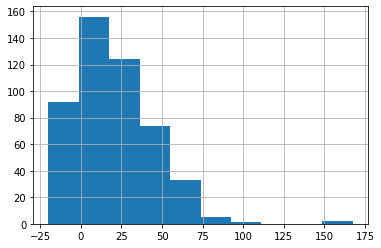

In [590]:
final_ranking.overall_score.hist()

In [574]:
final_ranking.to_csv('final_ranking_posting.csv',index=False)